In [10]:
import matplotlib.pyplot as plt
from skimage.transform import radon
import tomo.tomography as tg
import mcmc.fourier as fourier
import mcmc.plotting as p
import mcmc.randomGenerator as rg
import mcmc.L as L
import numpy as np
import scipy.linalg as sla
import scipy.special as ssp

In [11]:
basis_number = 2**4
f = fourier.FourierAnalysis_2D(basis_number,64,-0.5,0.5)
t = tg.Tomograph('shepp.png',f,target_size=2*f.extended_basis_number,n_theta=180,relative_location='phantom_images')
#%%
#add regulising
sigma_u = 5e6
sigma_v = 1e2
kappa = 1e17
d = 2
nu = 2 - d/2
alpha = nu + d/2
beta_u = (sigma_u**2)*(2**d * np.pi**(d/2) * ssp.gamma(alpha))/ssp.gamma(nu)
beta_v = beta_u*(sigma_v/sigma_u)**2
sqrtBeta_v = np.sqrt(beta_v)
sqrtBeta_u = np.sqrt(beta_u)

In [8]:
v,res,rank,s = sla.lstsq(t.H,t.sinogram.flatten('C'),lapack_driver='gelsy')

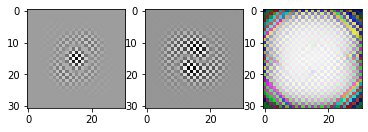

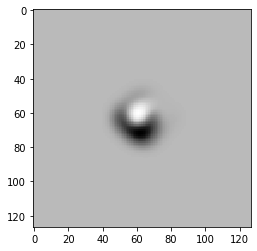

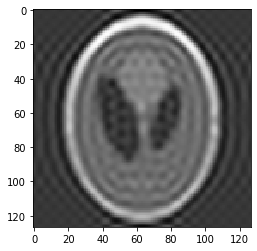

In [9]:
vForiginalHalf = f.fourierTransformHalf(t.target_image)
vF = v.reshape(2*f.basis_number-1,2*f.basis_number-1,order='C')
#%%

fig, ax = plt.subplots(ncols=3)
ax[0].imshow(vF.real,cmap=plt.cm.Greys_r)
ax[1].imshow(vF.imag,cmap=plt.cm.Greys_r)
ax[2].imshow(p.colorize(vF))
#%%
reconstructed_image = f.inverseFourierLimited(vF[:,basis_number-1:])
reconstructed_image2 = f.inverseFourierLimited(vForiginalHalf)
scale = np.max(reconstructed_image2-np.min(reconstructed_image2))/np.max(reconstructed_image-np.min(reconstructed_image))
reconstructed_image = reconstructed_image*scale
#%%
plt.figure()
plt.imshow(reconstructed_image,cmap=plt.cm.Greys_r)
plt.figure()
plt.imshow(reconstructed_image2,cmap=plt.cm.Greys_r)
plt.show()

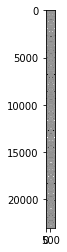

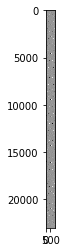

In [5]:
plt.figure()
plt.imshow(t.H.real,cmap=plt.cm.Greys_r)
plt.figure()
plt.imshow(t.H.imag,cmap=plt.cm.Greys_r)
plt.show()

In [6]:
numel=t.H.shape[0]*t.H.shape[1]
(numel- np.count_nonzero(t.H))/numel

0.015625